In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

## Series
Stwórzmy prosty szereg (czyli wektor), który będzie składał się z dwóch wierszy.

*Zwróć uwagę*, że każdy wiersz ma indeks. W tym przypadku `row1` to indeks, a `row1 col a` to jest wartość.

In [2]:
sq = pd.Series({
    'row1': 'row1 value', 
    'row2': 'row2 value'})
sq

row1    row1 value
row2    row2 value
dtype: object

`Series` to są dane w formie jednej kolumny lub wektora. Każdy szereg ma wartości oraz indeksy. Jak można zauważyć wyżej, te indeksy w przeciwieństwie do `list` i `ndarray` nie muszą być liczbami. Aby dostać się do indeksów, możemy użyć `.index`. Zobacz.

In [3]:
sq.index

Index(['row1', 'row2'], dtype='object')

Używając `.values` wylosujemy wartości z typu `Series` do `numpy.ndarray`. Będziemy używać tego mechanizmu później
(więc warto zwrócić na to uwagę).

In [4]:
sq.values

array(['row1 value', 'row2 value'], dtype=object)

Zwróć uwagę, że `.values` zwraca `ndarray` (czyli `numpy`). 

Na wszelki wypadek sprawdźmy typ zmiennej.

In [5]:
type(sq.values)

numpy.ndarray

In [6]:
type(sq)

pandas.core.series.Series

Przypomnę, że można łatwo rzutować z `ndarray` na `list` używając `list()`.

In [7]:
list(sq.values)

['row1 value', 'row2 value']

## DataFrame

Jak już było wspomniane wcześniej, szereg to pojedyncza kolumna. Jeśli chcemy wczytać dane w postaci "tablicy" (np. plik Excel), to wtedy na pomoc przychodzi nam `DataFrame`. 

Zróbmy tablicę, która składa się z trzech kolumn i dwóch wierszy.

In [8]:
df = pd.DataFrame(
    {
     'column_a': {'row1': 'row1 col a', 'row2': 'row2 col a'}, 
     'column_b': {'row1': 'row1 col b', 'row2': 'row2 col b'}, 
     'column_c': {'row1': 'row1 col c', 'row2': 'row2 col c'}, 
    })
df

,column_a,column_b,column_c
row1,row1 col a,row1 col b,row1 col c
row2,row2 col a,row2 col b,row2 col c


Teraz rozłóżmy `DataFrame` na czyniki pierwsze:

Kiedy danych jest mało, to "wszystkie" operacje (np. mnożenie) działają szybko. Natomiast czasy kiedy danych było mało już minęły (niestety czy na szczęście? ;) ). Teraz danych jest coraz więcej i trzeba z tym jakoś sobie radzić. Można pisać złożony kod w takich językach jak "C++", ale to jest czasem zbyt trudne ... Dlatego pojawiło się takie narzędzie/biblioteka jak `pandas` ze swoim `DataFrame`, który działa optymalnie, czyli wystarczająco dobrze (ang. *good enough*).

### Indeks
Do wszystkich indeksów, podobnie jak w `Series`, można dostać się używając `.index`.

In [9]:
df.index

Index(['row1', 'row2'], dtype='object')

`DataFrame` ma również wbudowane metody, za pomocą których możemy wybierać wiersze po indeksie. To są `.loc[]` oraz `.iloc[]`. Czym różnią się od siebie te 2 metody? `.loc[]` pozwala nam wybrać indeksy po nazwach, tak jak w powyższym przypadku, gdzie mamy `row1` i `row2` albo np. gdybyśmy w indeksach mieli daty (co jest dosyć popularne kiedy pracujemy z [szeregami czasowymi](https://pl.wikipedia.org/wiki/Szereg_czasowy). Z kolei `.iloc[]` pozwala nam wybrać po indeksie numerycznym, tak jak to jest w `ndarray`. Zobaczmy.

In [10]:
df.loc[['row2']]

,column_a,column_b,column_c
row2,row2 col a,row2 col b,row2 col c


albo tak

In [11]:
df.loc[['row2'], ['column_b']]

,column_b
row2,row2 col b


Dla czytelności (na początek), można zapisać to w ten sposób: 

In [12]:
selected_rows = ['row2']
selected_cols = ['column_b', 'column_c']

df.loc[selected_rows, selected_cols]

,column_b,column_c
row2,row2 col b,row2 col c


Zwróć uwagę, że możesz zmieniać kolejność, np. w ten sposób:

In [13]:
selected_rows = ['row2', 'row1']
selected_cols = ['column_c', 'column_b']

df.loc[selected_rows, selected_cols]

,column_c,column_b
row2,row2 col c,row2 col b
row1,row1 col c,row1 col b


Wtedy, kiedy chcemy wypisać wszystko, to zamiast listy wybranych kolumn (wierszy) dodajemy operator `:`. Mam nadzieję, że ten zapis wygląda dla Ciebie już czytelnie.

In [14]:
df.loc[selected_rows, :]

,column_a,column_b,column_c
row2,row2 col a,row2 col b,row2 col c
row1,row1 col a,row1 col b,row1 col c


A ten?

In [15]:
df.loc[:, selected_cols]

,column_c,column_b
row1,row1 col c,row1 col b
row2,row2 col c,row2 col b


Jeszcze czasem możemy używać `.iloc`, podobnie jak `.loc`, tylko w tym przypadku trzeba podać pozycję (zamiast nazwy).

In [16]:
selected_rows = [1]
selected_cols = [2, 1]

df.iloc[selected_rows, selected_cols]

,column_c,column_b
row2,row2 col c,row2 col b


Jak widzisz, w wyniku użycia `.iloc[]`, jak i `.loc[]` otrzymaliśmy przefiltrowane `DataFrame`.

Warto również wiedzieć, że jeśli wpiszemy nazwę/indeks kolumny w pojedynczych nawiasach `[]`, to wtedy otrzymamy `Series`. Wynika to z tego, że każdy wiersz w `DataFrame` to `Series`. 

### Kolumny

Używając `.columns` można sprawdzić, jakie kolumny posiada `DataFrame`.

In [18]:
df.columns

Index(['column_a', 'column_b', 'column_c'], dtype='object')

*Swoją drogą*, jeśli chcesz dostać się do listy kolumn (bo to będzie nam często potrzebne), to rzutujemy przy pomocy `list` lub można rzutować do `ndarray`. Poniżej jest przykład (zwróć na to uwagę).

In [19]:
list(df.columns)

['column_a', 'column_b', 'column_c']

W ten sposób możemy nadpisać nazwy kolumn.

In [20]:
df.columns = ['new_column_a', 'new_column_b', 'new_column_c']
df

,new_column_a,new_column_b,new_column_c
row1,row1 col a,row1 col b,row1 col c
row2,row2 col a,row2 col b,row2 col c


Tylko zwróć uwagę, że nowa lista musi mieć dokładnie taką samą liczbę elementów, ile jest kolumn. Zobacz, co się stanie, jeśli będzie inaczej.

In [21]:
df.columns = ['new_column_a']

ValueError: Length mismatch: Expected axis has 3 elements, new values have 1 elements

Jak widzisz pojawił się wyjątek `ValueError: Length mismatch: Expected axis has 3 elements, new values have 1 elements`, który mówi o tym, że oczekuje się listy z trzema elementami, jednak obecna ma tylko dwa elementy.

Czasem jest taka sytuacja, że chcesz zmienić punktowo nazwę tylko jednej kolumny, wtedy można to zrobić w taki sposób jak poniżej. 

In [22]:
df.rename(columns={'new_column1': 'abc'})

,new_column_a,new_column_b,new_column_c
row1,row1 col a,row1 col b,row1 col c
row2,row2 col a,row2 col b,row2 col c


Tylko wynik tej operacji koniecznie warto zapisać, bo inaczej go stracisz. Masz co najmniej dwie opcje:
1. nadpisać df, czyli `df = df.rename(columns={'new_column1': 'abc'})`
2. Zastosować parameter `inplace=True` (swoją drogą, zapamiętaj go, będzie jeszcze potrzebny w innych miejscach), czyli `df.rename(columns={'new_column1': 'abc'}, inplace=True)`

Sprawdźmy, czy istnieje nowa kolumna o nazwie `new_column_a`.

*Zwróć uwagę*, że dostanie się do poszczególnej kolumny w pandas można zrobić na dwa sposoby (zakładając, że nazwa dataframe to `df` a nazwy kolumny `name_col`):
- `df['name_col']`
- `df.name_col`

In [23]:
df.new_column_a

row1    row1 col a
row2    row2 col a
Name: new_column_a, dtype: object

In [24]:
type(df.new_column_a)

pandas.core.series.Series

## Usunięcie kolumny w dataframe

In [25]:
del df['new_column_a']

Natomiast jeśli odpalisz to dwa razy, to za drugim razem zobaczysz wyjątek (mówiący o tym, że kolumna `new_column_a` nie istnieje). Dlatego warto napisać to inaczej (stabilna konstrukcja). Najpierw warto sprawdzić, czy kolumna istnieje i jeśli tak, to wtedy ją usunąć.

In [26]:
if 'new_column_a' in df: del df['new_column_a']

In [27]:
df.head()

,new_column_b,new_column_c
row1,row1 col b,row1 col c
row2,row2 col b,row2 col c


## Wczytanie danych z pliku
Wystarczy użyć funkcji `read_csv`.

In [28]:
df = pd.read_csv('../input/train.csv')

Pandas umożliwia wczytać dane z wielu innych źródeł. Wpisz `pd.read_` i następnie kliknij `TAB`. Najbardziej popularne to `.read_cvs()`, `.read_excel()`, `.read_hdf()` (tego formatu użyjemy jeszcze później) oraz `.read_sql()`.

## Pytania:

1. Ile jest obiektów (wierszy) oraz cech (kolumn)?
2. Jakie są nazwy cech (kolumn)?
3. Jakiego typy są zmienne?
4. Jak dużo pamięci jest zaalokowane?

Użyjmy funkcji `.info()` dla znalezienia odpowiedzi.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


1. `RangeIndex: 10886 entries, 0 to 10885` =>  **10886 wierszy** (obiektów)
2. `Data columns (total 12 columns):` => jest **12 kolumn** (cech)
3. `dtypes: float64(3), int64(8), object(1)` => trzy rodzaje danych (float, int, object)
4. `memory usage: 1020.6+ KB` => zużywa ponad 1MB (1020.6 KB)

In [30]:
print("count samples & features: ", df.shape)
print("Are there missing values: ", df.isnull().any().any())

count samples & features:  (10886, 12)
Are there missing values:  False


In [31]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


### Unikalne wartości w kolumnie `season`

In [32]:
df.season.unique()

array([1, 2, 3, 4], dtype=int64)

Liczba unikalnych wartości jest bardzo przydatna, wtedy kiedy unikalnych wartości jest dużo.

In [33]:
df.season.nunique()

4

In [34]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Sprawdźmy, ile jest unikalnych wartości w poszczególnych zmiennych.

In [35]:
for column in df.columns:
    print(column, df[column].nunique())

datetime 10886
season 4
holiday 2
workingday 2
weather 4
temp 49
atemp 60
humidity 89
windspeed 28
casual 309
registered 731
count 822


## Categorical variables:
* season: 4 unique values
* holiday: 2 (binary)
* workingday: 2 (binary)
* weather: 4

In [36]:
df.holiday.unique()

array([0, 1], dtype=int64)

## Praca z datami
Można rzutować kolumnę do typu `datetime` używając do tego funkcji `to_datetime()`.

In [37]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


Można nawet przy wczytaniu podać, które kolumny są datami i parsować je w locie.

In [38]:
df = pd.read_csv('../input/train.csv', parse_dates=['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## Spróbujmy zrozumieć dane
https://www.kaggle.com/c/bike-sharing-demand/data

Opis poniżej po angielsku:
- **datetime** - hourly date + timestamp  
- **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- **holiday** - whether the day is considered a holiday
- **workingday** - whether the day is neither a weekend nor holiday
- **weather** -   
    1: Clear, Few clouds, Partly cloudy, Partly cloudy  
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- **temp** - temperature in Celsius
- **atemp** - "feels like" temperature in Celsius
- **humidity** - relative humidity
- **windspeed** - wind speed
- **casual** - number of non-registered user rentals initiated
- **registered** - number of registered user rentals initiated
- **count** - number of total rentals

In [39]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Wyciąganie day, month, year... from datetime

Teraz będzie jeden z najtrudniejszych kawałków kodu, ale dasz radę :). Spróbujmy zjeść słonia po kawałku.

W ten sposób możemy wyciągnąć dzień z `datetime`:

In [40]:
df.datetime.dt.day.head()

0    1
1    1
2    1
3    1
4    1
Name: datetime, dtype: int64

W ten sposób możemy wyciągnąć godzinę z `datetime`

In [41]:
df.datetime.dt.hour

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: datetime, Length: 10886, dtype: int64

Zróbmy teraz wykres (poniżej jest wytłumaczenie kodu).

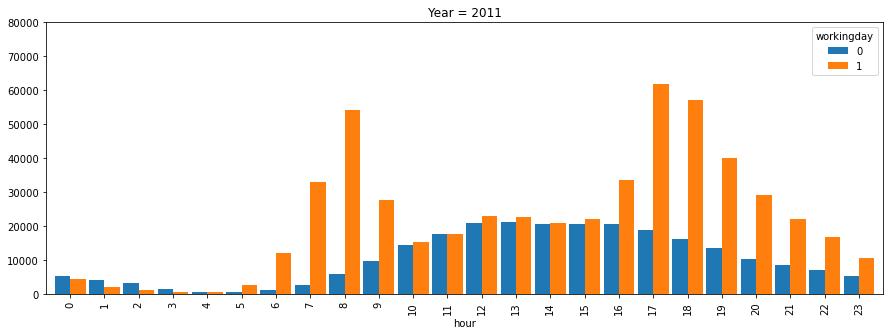

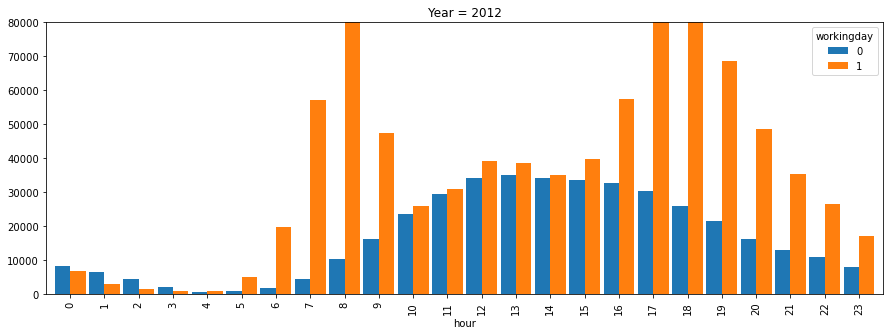

In [42]:
def plot_by_hour(data, year=None, agg='sum'):
    data['hour'] = data.datetime.dt.hour
    dd = data[ data.datetime.dt.year == year ] if year else data
    
    by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack()
    return by_hour.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year))


plot_by_hour(df, year=2011)
plot_by_hour(df, year=2012);

Na pierwszy rzut oka `plot_by_hour` może wyglądać nieco przerażająco. Przejdziemy linia po linii, żeby wyjaśnić, co tam się dzieje:

1. `data['hour'] = data.datetime.dt.hour`
w tej linii wyciągamy godzinę z `datetime` i przypisujemy ją do nowej kolumny `data['hour']`
   
   
2. `dd = data[ data.datetime.dt.year == year ] if year else data`
w tej linii filtrujemy dane po roku (o ile rok jest znany).

Zobacz, jak działa konstrukcja `1 if True else 2`. Jeśli warunek jest spełniony, to jest zwracane to, co jest przed `if` w tym przypadku to będzie `1`. Natomiast jeśli warunek nie jest spełniony, to zwracane jest to, co stoi po `else`. Dość wygodna konstrukcja, kiedy jedną linią załatwiamy dużo :).

Podsumowując, zmienna `dd` ma dwie opcje: albo zawiera wszystkie oryginalne dane lub tylko dane z tego roku, który jest podany w zmiennej `year`.


3. `by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack()`
w tej linii grupujemy dane po `hour` oraz `workingday` (roboczy dzień). 
Następnie w `agg` wskazujemy funkcję agregującą (np. wartość średnia). Funkcja agregująca to taka funkcja, która na wejściu dostaje wiele wartości, natomiast na wyjściu tylko jedną (czyli agreguje wartości na wejściu w jedną, używając jakiejś funkcji do tego).

Uwaga! Więcej o grupowaniu jest w kolejnej lekcji.

Na samym końcu jest `unstack`. To jest szybki *trik* transformacji z `Series` do `DataFrame`.

4. `return by_hour.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year))`

Mimo że ta linia jest najdłuższa, to robi prostą rzecz - wykres. Rdzeniem tej linii jest ten kawałek: `by_hour.plot(kind='bar')`, gdzie `by_hour` to jest *dataframe* (utworzyliśmy go w trzeciej linii) i następnie są tylko parametry, np. `ylim=(0, 80000)` mówi, że wartości na `y` będą `0` do `80000`. Robi się to, żeby wszystkie wykresy były porównywalne (bo na `y` mają tę samą skalę). `figsize=(15,5)` - to rozmiar wykresu.

Teraz już wszystko powinno być zrozumiałe. Stwórzmy zatem na podobnych zasadach kolejną funkcję `plot_by_year`.

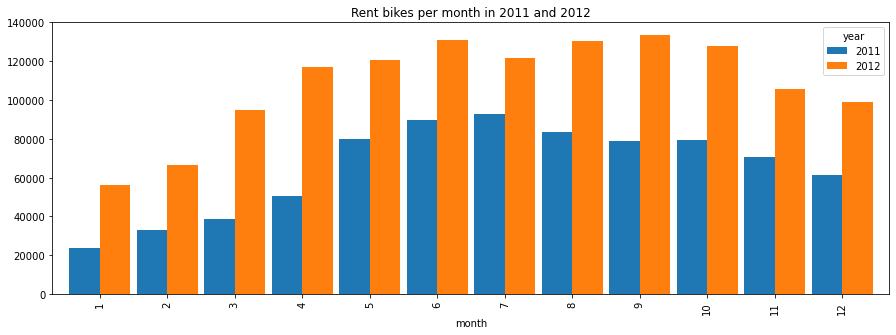

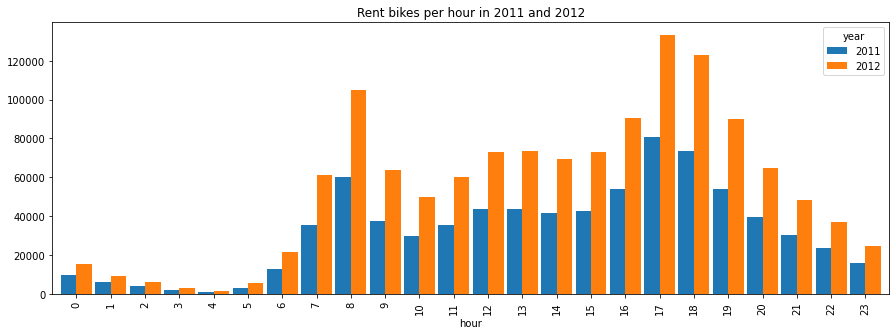

In [43]:
def plot_by_year(data, agg_attr, title):
    data['year'] = data.datetime.dt.year
    data['month'] = data.datetime.dt.month
    data['hour'] = data.datetime.dt.hour
    
    by_year = data.groupby([agg_attr, 'year'])['count'].agg('sum').unstack()
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title)


plot_by_year(df, 'month', "Rent bikes per month in 2011 and 2012")
plot_by_year(df, 'hour', "Rent bikes per hour in 2011 and 2012");

## Zadanie 0.4.1
Inspirując się funkcjami `plot_by_hour` oraz `plot_by_year`, zrób podobną funkcję dla miesięcy, czyli `plot_by_month`.

W praktyce to oznacza, że teraz chcesz pogrupować dane per miesiąc (przed tym było per godzinę czy rok).

*Podpowiedź*: do zmiany masz jedną małą rzecz, podpowiem Ci krok po kroku:
1. skopiować w całości poprzednią funkcję (np. `plot_by_year`)
2. zmienić nazwę funkcji na `plot_by_month`
3. znaleźć linijkę, gdzie jest grupowanie (`groupby`) i zmienić tam `year` na `month` :).


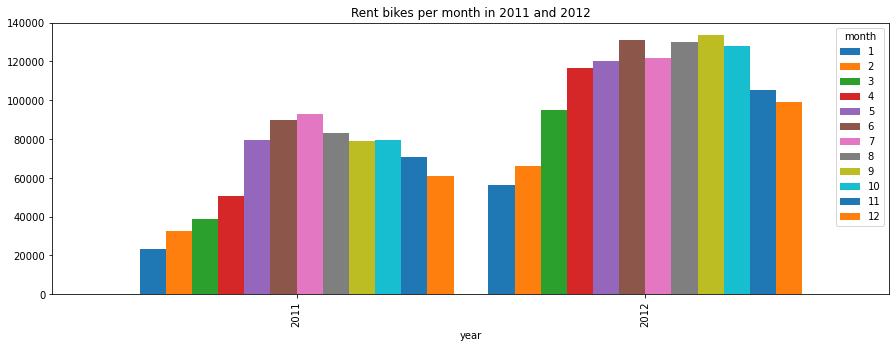

In [44]:
def plot_by_month(data, agg_attr, title):
    data['year'] = data.datetime.dt.year
    data['month'] = data.datetime.dt.month
    data['hour'] = data.datetime.dt.hour
    
    by_year = data.groupby([agg_attr, 'month'])['count'].agg('sum').unstack()
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title)


plot_by_month(df, 'year', "Rent bikes per month in 2011 and 2012")

### Boxplot
Kolejny rodzaj wykresu - [wykres pudełkowy](https://pl.wikipedia.org/wiki/Wykres_pude%C5%82kowy) (eng. [*box plot*](https://en.wikipedia.org/wiki/Box_plot)), który może być przydatny do analizy rozkładu danych to `boxplot`. W pewnych przypadkach jest alternatywą do [histogramów](https://pl.wikipedia.org/wiki/Histogram).

C:\Users\Mateusz\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


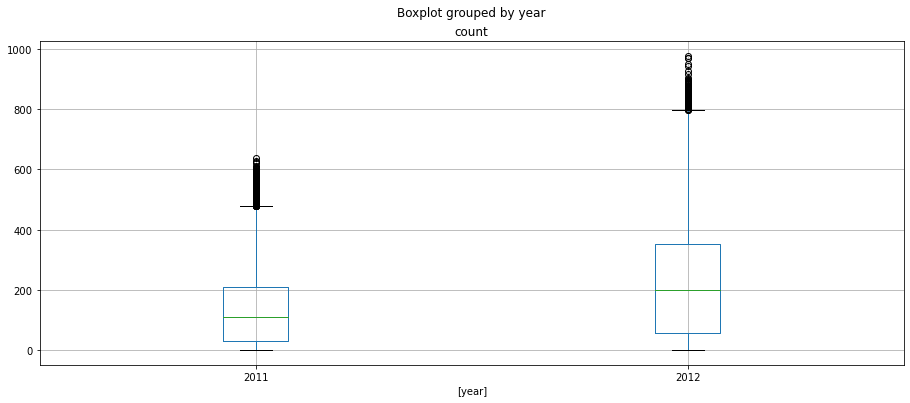

In [45]:
df[ ['count', 'year'] ].boxplot(by="year", figsize=(15, 6));

Teraz możemy odpalić `.boxplot` w pętli w dwóch wymiarach: lata i czy dzień był roboczy.

C:\Users\Mateusz\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Mateusz\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Mateusz\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

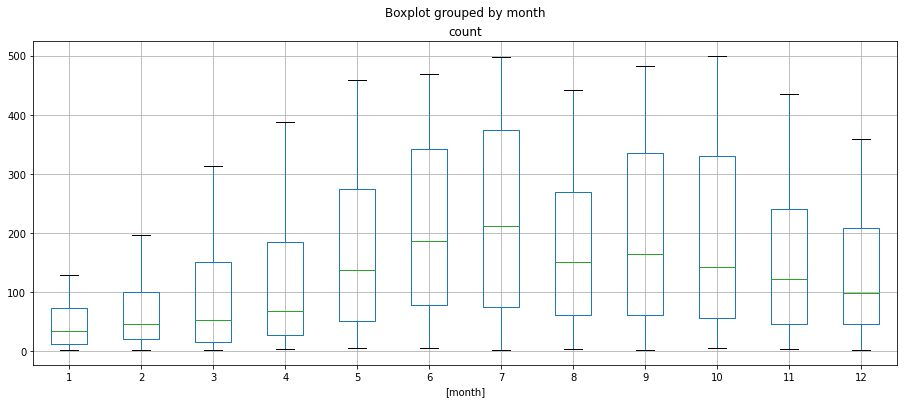

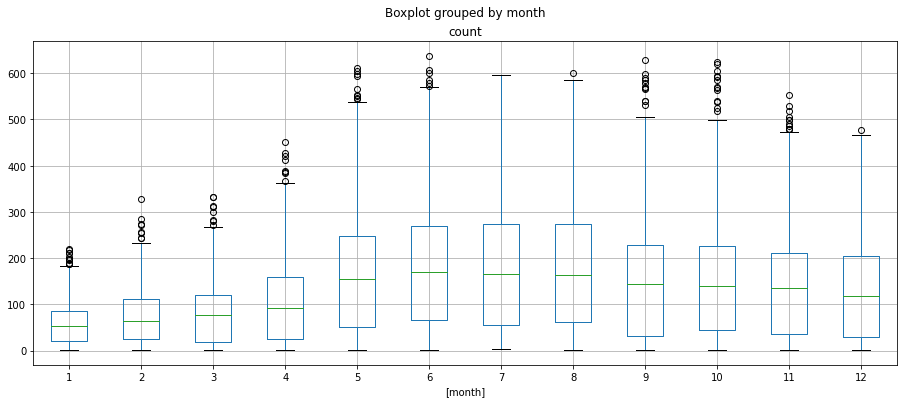

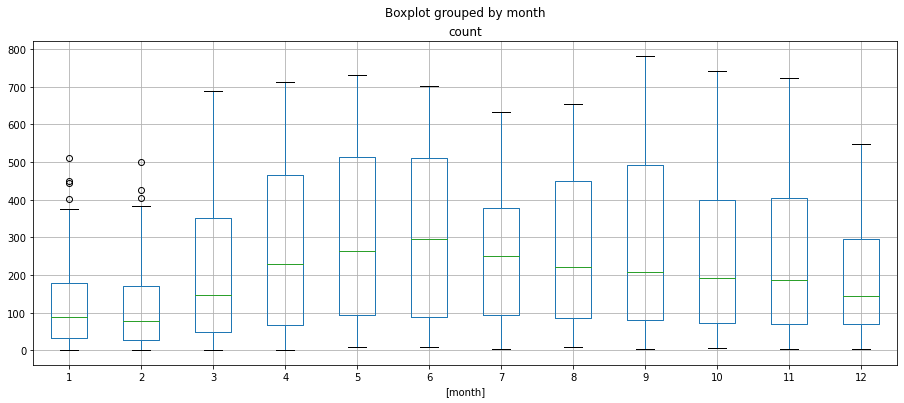

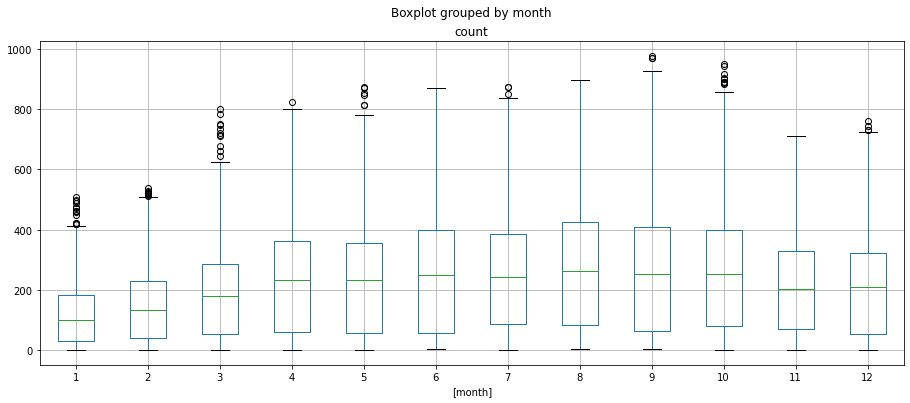

In [46]:
for year in [2011, 2012]:
    for workingday in [0, 1]:
        dd = df[ (df.datetime.dt.year == year) & (df.workingday == workingday) ]
        dd[ ['count', 'month'] ].boxplot(by="month", figsize=(15, 6));

## [Histogram](https://pl.wikipedia.org/wiki/Histogram)

W taki sposób łatwo można zbudować histogram, żeby zbadać rozkład danych.

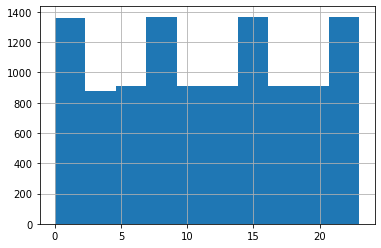

In [47]:
df['hour'].hist();

## Mapowanie
### Pogoda
W danych było napisane w ten sposób:
1. **Clear**: niebo częściowo zachmurzone, częściowe zachmurzenie, częściowe zachmurzenie
2. **Mist**: pochmurnie, mgła + zachmurzenie, mgła + niewielkie chmury, mgła
3. **Light Snow**:słaby deszcz + burza z piorunami + lekkie zachmurzenie + lekkie zachmurzenie
4. **Heavy Rain**: leje jak z cebra + burza z piorunami + mgła, śnieg + mgła

Naszym zadaniem jest przypisać mapowanie, np. zamiast 1 chcemy, żeby było `Clear`, zamiast 2 - `Mnist` itd.

Żeby to zrobić, najpierw tworzymy słownik, gdzie jest mapowana "skąd" oraz "dokąd" i następnie używając funkcji `.map` przekształcamy wartości. Wynik przypisujemy do nowej kolumny (w tym przypadku `weather_label`).

In [48]:
weather = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}
df['weather_label'] = df.weather.map(lambda x: weather[x])

df['weather_label'].unique()

array(['Clear', 'Mist', 'Light Snow', 'Heavy Rain'], dtype=object)

Zwróć uwagę na funkcję `.unique()`, która zwraca wszystkie unikalne wartości w serii. Dość często jest używana.

## Zadanie 0.4.2
Twoim zadaniem jest przypisać `label` do kolumny `workingday`, np. można zrobić to tak. Do wartości **1** będzie **workingday**, a do wartości **0** będzie **weekend**.

In [49]:
workingday = {0: 'weekend', 1: 'workingday'}
df['workingday'] = df.workingday.map(lambda x: workingday[x])

df['workingday'].unique()

array(['weekend', 'workingday'], dtype=object)

## Apply

Ta funkcja jest bardzo potrzebna przy `feature engineering`. Co to za zwierzę, dowiesz się potem. Najpierw poznaj konstrukcję, jak na podstawie dwóch (czy kilku innych kolumn) stworzyć nową.

Załóżmy, że mamy kolumnę `a` oraz `b` i chcemy np. je sumować. Jak to można osiągnąć?

`df[ ['a', 'b'] ].apply(lambda row: row['a'] + row['b'], axis=1)`
Zwróć uwagę na `axis=1` na końcu. Sam parameter ma dziwną nazwę, ale oznacza to, że chcemy przejść wiersz po wierszu (dlatego po prostu zapamiętaj, że trzeba to dodać).

Poniżej to samo tylko trochę w bardziej "rozdmuchanej" formie.

In [50]:
df[ ['weather', 'season'] ].apply(lambda x: 'weather-{0}, season-{1}'.format(x['weather'], x['season']), axis=1).head()

0    weather-1, season-1
1    weather-1, season-1
2    weather-1, season-1
3    weather-1, season-1
4    weather-1, season-1
dtype: object

## Zadanie 0.4.3

Twoim zadaniem jest zsumować dwie kolumny `casual` oraz  `registered` i przypisać je do nowej kolumny (np. `sum_count`).

Bardziej zaawansowana część tego zadania to porównać, czy `sum_count` jest identyczna jak `count`.

In [51]:
df['sum_count'] = df[ ['casual', 'registered'] ].apply(lambda row: row['casual'] + row['registered'], axis=1)
any(df['sum_count'] != df['count'])

False

## Value counts

Dość często stosowana funkcja, której używamy zwykle podczas badania rozkładu danych. W wyniku `.value_counts()` można zobaczyć, jakie są unikalne wartości oraz jak dużo ich jest.

In [52]:
df.year = df.datetime.dt.year

df['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

W tym przypadku już wiem, że mamy **5464** wierszy z rokiem `2012` oraz **5422** z rokiem `2011`.

## Zadanie 0.4.4
Twoim zadaniem jest zastosować `.value_counts()` dla `month` i zinterpretować wynik.

In [53]:
df.month = df.datetime.dt.month

df['month'].value_counts()

7     912
6     912
5     912
12    912
8     912
11    911
10    911
4     909
9     909
3     901
2     901
1     884
Name: month, dtype: int64

## Przydatne linki:
1. [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Pandas Tutorial: Data analysis with Python: Part 1](https://www.dataquest.io/blog/pandas-python-tutorial/)
3. [Python: Pandas Tutorial | Intro to DataFrames](https://www.youtube.com/watch?v=e60ItwlZTKM)
4. [Book: Data Manipulation with Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)
5. [DataWorkshop webinar: Wprowadzenie do pandas](https://www.youtube.com/watch?v=zRahH6LkY40)
6. [What is pandas? (Introduction to the Q&A series)](https://www.youtube.com/watch?v=5_QXMwezPJE&index=2&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y)